Suppose you work as data scientist at a major bank in NYC and you have been asked to develop a model that can predict whether a customer will retire or not based on customer features. The features we have are the age and net savings(retirement savings)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bank_df=pd.read_csv('Bank_Customer_retirement.csv')

In [3]:
bank_df.head()

,Customer ID,Age,Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  500 non-null    int64  
 1   Age          500 non-null    float64
 2   Savings      500 non-null    float64
 3   Retire       500 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 15.8 KB


In [5]:
#drop the customer_id

In [6]:
bank_df.drop('Customer ID',axis=1,inplace=True)

In [7]:
bank_df.head()

,Age,Savings,Retire
0,39.180417,322349.8740,0
1,56.101686,768671.5740,1
2,57.023043,821505.4718,1
3,43.711358,494187.4850,0
4,54.728823,691435.7723,1


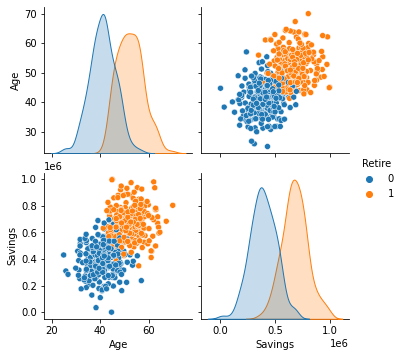

In [8]:
#Visualize the data
sns.pairplot(bank_df,hue='Retire',vars=['Age','Savings'])

In [9]:
bank_df['Retire'].value_counts()

0    250
1    250
Name: Retire, dtype: int64

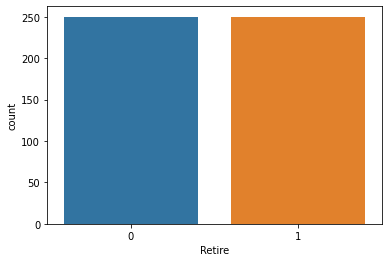

In [10]:
sns.countplot(x='Retire',data=bank_df)
plt.show()

In [11]:
bank_df.isnull().sum()

Age        0
Savings    0
Retire     0
dtype: int64

Data Split

In [12]:
X=bank_df.drop(['Retire'],axis=1)

In [13]:
#create the target set
y=bank_df['Retire']

In [14]:
#split the datasets into four subsets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1002)

In [15]:
from sklearn.svm import SVC

In [16]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [17]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=svc_model.predict(X_test)
cm=confusion_matrix(y_test,y_predict)

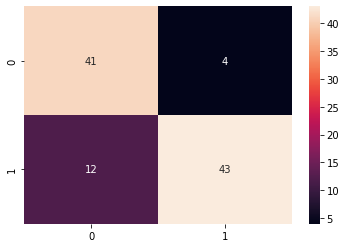

In [18]:
sns.heatmap(cm,annot=True)
plt.show()

In [19]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        45
           1       0.91      0.78      0.84        55

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



In [20]:
#Overall SVC classifier gives 84% of accuracy

Improving the model using feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [27]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [28]:
svc_model=SVC()
svc_model.fit(X_train,y_train)

SVC()

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict=svc_model.predict(X_test)
cm=confusion_matrix(y_test,y_predict)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.96      0.89      0.92        55

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100



In [30]:
#Accuracy increased by standardscaling by 92%